<a href="https://colab.research.google.com/github/KISHANSINHAA/da/blob/main/DA_Assignnment_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Understanding Descriptive Statistics with python

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

descriptive statistics

In [115]:
path="Housing_Sales_Data_200.csv"
df = pd.read_csv(path)

In [116]:
df.describe()

,House_ID,Bedrooms,Bathrooms,Size_sqft,Year_Built,Price_USD
count,200.000000,200.000000,200.000000,200.000000,200.000000,2.000000e+02
mean,100.500000,3.000000,2.005000,2831.780000,1985.860000,6.996925e+05
std,57.879185,1.417762,0.811336,1238.474378,22.406711,4.121694e+05
min,1.000000,1.000000,1.000000,614.000000,1950.000000,6.687200e+04
25%,50.750000,2.000000,1.000000,1736.500000,1966.000000,3.946360e+05
50%,100.500000,3.000000,2.000000,2935.500000,1984.500000,6.038040e+05
75%,150.250000,4.000000,3.000000,3860.250000,2005.000000,9.460320e+05
max,200.000000,5.000000,3.000000,4992.000000,2024.000000,1.936896e+06


In [117]:
df.head()

,House_ID,Location,House_Type,Bedrooms,Bathrooms,Size_sqft,Year_Built,Price_USD,Garage,Garden
0,1,Riverside,Villa,4,2,2193,1950,712725,Yes,No
1,2,Downtown,Apartment,5,2,2182,2003,715696,Yes,No
2,3,Riverside,Villa,3,2,619,1952,240172,Yes,Yes
3,4,Countryside,Villa,5,3,1330,1965,331170,Yes,No
4,5,Downtown,Apartment,5,3,4175,2006,1569800,No,No


In [118]:
df.shape

(200, 10)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   House_ID    200 non-null    int64 
 1   Location    200 non-null    object
 2   House_Type  200 non-null    object
 3   Bedrooms    200 non-null    int64 
 4   Bathrooms   200 non-null    int64 
 5   Size_sqft   200 non-null    int64 
 6   Year_Built  200 non-null    int64 
 7   Price_USD   200 non-null    int64 
 8   Garage      200 non-null    object
 9   Garden      200 non-null    object
dtypes: int64(6), object(4)
memory usage: 15.8+ KB


In [120]:
saleprice = df['Price_USD']

m1=np.mean(saleprice)
print(m1)
mean=saleprice.mean()
median=saleprice.median()
mode=saleprice.mode()

print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])



699692.53
Mean:  699692.53 
Median:  603804.0 
Mode:  66872


Measures to find the spread of data

In [121]:
saleprice.min() #maximum value of salePrice

66872

In [122]:
saleprice.max() #minimum value of salePrice

1936896

In [123]:
#Range
saleprice.max()-saleprice.min()

1870024

In [124]:
#variance
saleprice.var()

169883586372.37094

In [125]:
from math import sqrt

#standard deviation
std = sqrt(saleprice.var())
std

412169.36612559034

In [126]:
t1=saleprice.std()
print(t1)

412169.36612559034


In [127]:
#skewness
saleprice.skew()

np.float64(0.8326129457494805)

In [128]:
#kutosis
saleprice.kurt()

np.float64(0.10020031730810475)

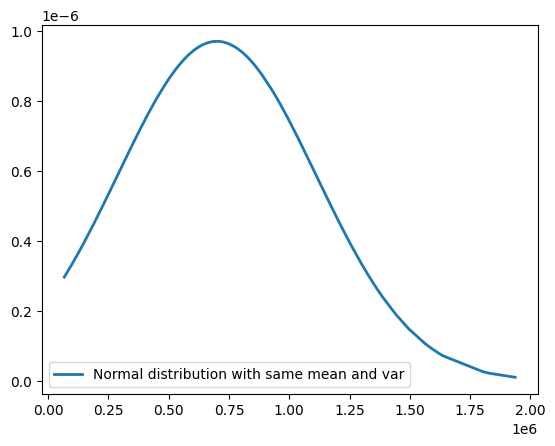

In [129]:
#convert pandas DataFrame object to numpy array and sort
h = np.asarray(df['Price_USD'])
h = sorted(h)

#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(h, np.mean(h), np.std(h))

#plot both series on the histogram
plt.plot(h,fit,'-',linewidth = 2,label="Normal distribution with same mean and var")
#plt.hist(h,density=False,bins = 100,label="Actual distribution")
plt.legend()
plt.show()

We can see int the above graph that it is positively skewed with skewness score 1.93 and also has positive kurtosis(k=6.735)

           Bedrooms  Bathrooms  Size_sqft  Price_USD
Bedrooms   1.000000   0.078635  -0.053681  -0.080619
Bathrooms  0.078635   1.000000   0.028262  -0.024479
Size_sqft -0.053681   0.028262   1.000000   0.735826
Price_USD -0.080619  -0.024479   0.735826   1.000000


<Axes: >

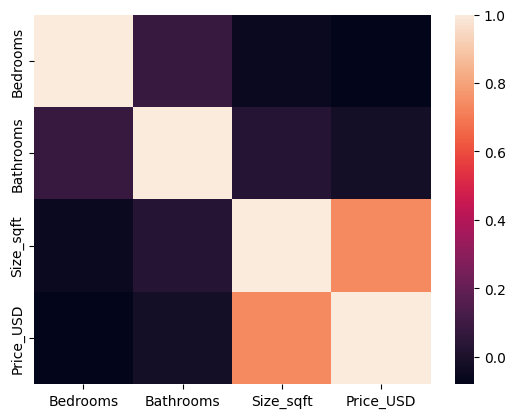

In [130]:
#checking correlation of 4 countinous variables
import seaborn as sns
%matplotlib inline
corelation=df[['Bedrooms','Bathrooms','Size_sqft','Price_USD']].corr()
print (corelation)

sns.heatmap(corelation)

In [131]:
#covariance
df[['Bedrooms','Bathrooms','Size_sqft','Price_USD']].cov().head()

,Bedrooms,Bathrooms,Size_sqft,Price_USD
Bedrooms,2.010050,0.090452,-9.425628e+01,-4.711037e+04
Bathrooms,0.090452,0.658266,2.839809e+01,-8.186083e+03
Size_sqft,-94.256281,28.398090,1.533819e+06,3.756108e+08
Price_USD,-47110.366834,-8186.083065,3.756108e+08,1.698836e+11


In [132]:
# #50 percentile i.e median
# np.percentile(df['salary'], 50)
saleprice.quantile(0.5)

np.float64(603804.0)

In [133]:
# q75 = np.percentile(df['salary'], 75)
# q75

q3 = saleprice.quantile(0.75)
q3

np.float64(946032.0)

In [134]:
#25th percentile
# q25 = np.percentile(df['salary'], 25)
q1 = saleprice.quantile(0.25)
q1

np.float64(394636.0)

In [135]:
#interquartile range
IQR = q3  - q1
IQR

np.float64(551396.0)

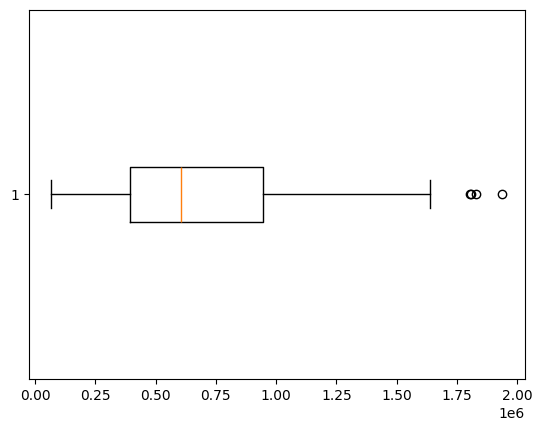

In [136]:
plt.boxplot(saleprice,vert=False)
plt.show()